In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import datasets

# Q1)Load any standard dataset.I have chosen iris for this

In [108]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data)
df.columns = iris.feature_names
df['CLASS'] = iris.target



In [9]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),CLASS
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [107]:
#Checking data types

In [11]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
CLASS                  int32
dtype: object

In [12]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
CLASS                0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   CLASS              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
CLASS,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [19]:
df.columns=['sepal length','sepal width','petal length','petal width','class']

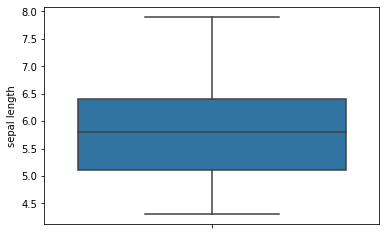

In [20]:

ax = sns.boxplot(y=df['sepal length'])

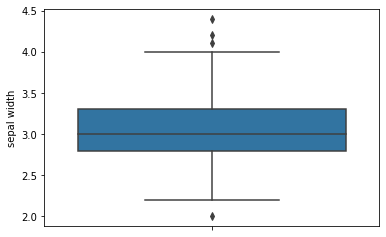

In [21]:

ax = sns.boxplot(y=df['sepal width'])

In [105]:
#some ouliers in sepal width

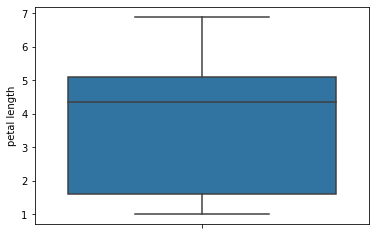

In [22]:

ax = sns.boxplot(y=df['petal length'])

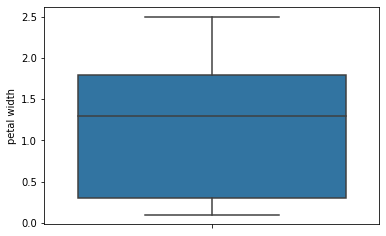

In [23]:

ax = sns.boxplot(y=df['petal width'])

In [25]:
df['class'].unique()

array([0, 1, 2])

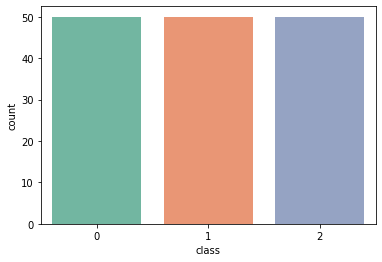

In [26]:
sns.countplot(x ='class', data = df,palette="Set2")

In [104]:
X.var()

sepal length    0.685694
sepal width     0.189979
petal length    3.116278
petal width     0.581006
dtype: float64

# Assumption for kmeans
##All classes are equally distributed
##They are similar density
##No outliers


In [28]:
X = df.drop('class',axis=1)   # Independent variables

y = df['class']

# Q2) Apply k-means algorithm with some k (e.g., k=3) on all numeric features (Numeric feature selection logic should be generic irrespective of the dataset).

In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled=sc.fit_transform(X)

In [106]:
#For applying kmeans data should be scaled

In [35]:
from sklearn.cluster import KMeans
model=KMeans(3)
model.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [36]:
centroids = model.cluster_centers_

In [47]:
centroids

array([[ 1.13140499,  0.07903422,  0.98537152,  0.99908828],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [-0.06881714, -0.89339955,  0.34522179,  0.28439302]])

In [58]:
preds = model.predict(X_scaled)



# Q3) Find intra-cluster distance for all the clusters (mean distance of data points from their centroid)

In [69]:
distances=[0]*3#3 clsuter summing up distances respectively
examples=[0]*3#No of examples in each cluster
from scipy.spatial import distance
for i in range(0,len(preds)):
    if(preds[i]==0):
        distances[0]+=distance.euclidean(X_scaled[i], centroids[0])
        examples[0]+=1
    elif(preds[i]==1):
        distances[1]+=distance.euclidean(X_scaled[i], centroids[1])
        examples[1]+=1
    elif(preds[i]==2):
        distances[2]+=distance.euclidean(X_scaled[i], centroids[2])
        examples[2]+=1

In [66]:
len(distances)

3

In [71]:
for i in range(0,len(distances)):# to get the mean distance in cluster
    distances[i]=distances[i]/examples[i]

In [75]:
distances

[0.9170011181070831, 0.8136652188646274, 0.8536223159863534]

# minimum mean distance is for cluster 1

# Q4) Find cluster with lowest intra-cluster distance and print n closest data points to the centroid of this cluster.

In [112]:
def closest_point(n):
    
    arr=[]
    for i in range(0,len(X_scaled)):
            if(preds[i]==1):#We need point only in cluster 1
                arr.append((distance.euclidean(X_scaled[i], centroids[1]),i))
    arr.sort()#will sort the tuple on the first value i.e the euclidean distance
    final=[]
    if(n>len(arr)):
        return "invalid input"
    for i in range(0,n):#final examples closest to cluster 1
        final.append(arr[i][1])
    
    return final
        
            

In [114]:
print(closest_point(50))

[7, 39, 40, 0, 17, 26, 28, 11, 27, 49, 24, 4, 37, 23, 43, 6, 20, 31, 35, 36, 29, 2, 21, 22, 47, 48, 34, 9, 10, 30, 19, 46, 3, 42, 44, 25, 1, 45, 12, 16, 18, 5, 38, 13, 8, 32, 14, 33, 15, 41]
